In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

scores = pd.read_csv('human_coronavirus_aln_scores.tsv', sep='\t', index_col=0)
scores

,NC_006577.2,MK167038.1,MH940245.1,KT779555.1,KT779556.1,KF686340.1,KF686341.1,KF686342.1,KF686343.1,KF686344.1,...,KF514391.1,KF514392.1,KF514393.1,KF514394.1,KF514395.1,KF514396.1,KF514397.1,KF514398.1,KF514399.1,KF514400.1
NC_006577.2,5000.0,4480.0,4462.0,4946.0,4946.0,4645.0,4648.0,4648.0,4654.0,4789.0,...,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0
MK167038.1,4480.0,5000.0,4964.0,4480.0,4480.0,4458.0,4461.0,4461.0,4467.0,4323.0,...,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5,986.5
MH940245.1,4462.0,4964.0,5000.0,4462.0,4462.0,4440.0,4443.0,4443.0,4449.0,4305.0,...,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5,976.5
KT779555.1,4946.0,4480.0,4462.0,5000.0,5000.0,4609.0,4612.0,4612.0,4618.0,4843.0,...,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
KT779556.1,4946.0,4480.0,4462.0,5000.0,5000.0,4609.0,4612.0,4612.0,4618.0,4843.0,...,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KF514396.1,1046.0,986.5,976.5,1018.0,1018.0,1026.0,1004.0,1004.0,1019.5,1029.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
KF514397.1,1046.0,986.5,976.5,1018.0,1018.0,1026.0,1004.0,1004.0,1019.5,1029.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
KF514398.1,1046.0,986.5,976.5,1018.0,1018.0,1026.0,1004.0,1004.0,1019.5,1029.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
KF514399.1,1046.0,986.5,976.5,1018.0,1018.0,1026.0,1004.0,1004.0,1019.5,1029.0,...,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0


In [2]:
scores_np = pd.DataFrame.to_numpy(scores)
scaler = MinMaxScaler() # масштабирует признаки в шкалу от 0 до 1
new_matrix = np.around(np.ones(scores.shape) - scaler.fit_transform(scores_np), 12) # вычитаем из единицы и округляем, 
# потому что из-за типа данных float в некоторых ячейках возникают очень маленькие, но отрицательные значения, а для t-SNE
# все значения должны быть больше 0
new_matrix

array([[ 0.        ,  0.12613705,  0.13034525, ...,  0.93574725,
         0.93574725,  0.93574725],
       [ 0.12607589, -0.        ,  0.00872199, ...,  0.94982842,
         0.94982842,  0.94982842],
       [ 0.13044005,  0.00873257,  0.        , ...,  0.95219501,
         0.95219501,  0.95219501],
       ...,
       [ 0.95866166,  0.97355973,  0.97480315, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95866166,  0.97355973,  0.97480315, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.95866166,  0.97355973,  0.97480315, ...,  0.        ,
         0.        ,  0.        ]])

In [3]:
df = pd.DataFrame(data=new_matrix, columns=scores.columns, index=scores.index)
df['type'] = ['HCoV-HKU1']*20 + ['MERS-CoV']*20 + ['SARS-CoV-2']*20 + ['HCoV-229E']*20 \
+ ['HCoV-NL63']*20 + ['HCoV-OC43']*20 + ['SARS-CoV']*20
df

,NC_006577.2,MK167038.1,MH940245.1,KT779555.1,KT779556.1,KF686340.1,KF686341.1,KF686342.1,KF686343.1,KF686344.1,...,KF514392.1,KF514393.1,KF514394.1,KF514395.1,KF514396.1,KF514397.1,KF514398.1,KF514399.1,KF514400.1,type
NC_006577.2,0.000000,0.126137,0.130345,0.013075,0.013075,0.085946,0.084809,0.084809,0.083615,0.051096,...,0.935747,0.935747,0.935747,0.935747,0.935747,0.935747,0.935747,0.935747,0.935747,HCoV-HKU1
MK167038.1,0.126076,-0.000000,0.008722,0.125908,0.125908,0.131219,0.129864,0.129864,0.128806,0.163942,...,0.949828,0.949828,0.949828,0.949828,0.949828,0.949828,0.949828,0.949828,0.949828,HCoV-HKU1
MH940245.1,0.130440,0.008733,0.000000,0.130266,0.130266,0.135577,0.134201,0.134201,0.133156,0.168301,...,0.952195,0.952195,0.952195,0.952195,0.952195,0.952195,0.952195,0.952195,0.952195,HCoV-HKU1
KT779555.1,0.013092,0.126137,0.130345,0.000000,0.000000,0.094662,0.093483,0.093483,0.092315,0.038019,...,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,HCoV-HKU1
KT779556.1,0.013092,0.126137,0.130345,0.000000,0.000000,0.094662,0.093483,0.093483,0.092315,0.038019,...,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,0.942374,HCoV-HKU1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KF514396.1,0.958662,0.973560,0.974803,0.964165,0.964165,0.962111,0.962776,0.962776,0.961938,0.961618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SARS-CoV
KF514397.1,0.958662,0.973560,0.974803,0.964165,0.964165,0.962111,0.962776,0.962776,0.961938,0.961618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SARS-CoV
KF514398.1,0.958662,0.973560,0.974803,0.964165,0.964165,0.962111,0.962776,0.962776,0.961938,0.961618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SARS-CoV
KF514399.1,0.958662,0.973560,0.974803,0.964165,0.964165,0.962111,0.962776,0.962776,0.961938,0.961618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,SARS-CoV


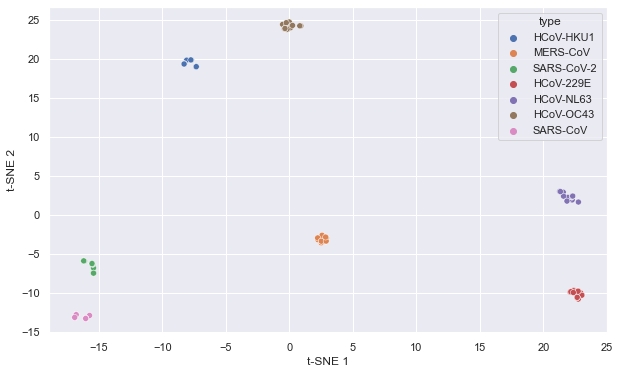

In [4]:
model = TSNE(n_components=2, perplexity=20, metric="precomputed")
X = model.fit_transform(new_matrix)

df['t-SNE 1'] = X[:, 0]
df['t-SNE 2'] = X[:, 1]
sns.set(rc={'figure.figsize':(10, 6)})
sns.scatterplot(x='t-SNE 1', y='t-SNE 2', data = df, hue='type');